# IMPORT LIBRARIES AND DATASET

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import libraries 
import pickle
import seaborn as sns
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [3]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("Data/traffic-sign-classification/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("Data/traffic-sign-classification/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("Data/traffic-sign-classification/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

#  IMAGE EXPLORATION

36

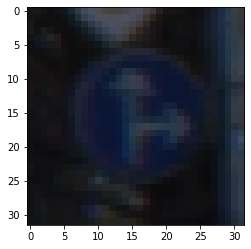

In [7]:
i = 1001
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

#  DATA PEPARATION

## Shuffle the dataset 

In [8]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [9]:
y_train

array([38, 31, 15, ...,  1,  8,  6], dtype=uint8)

In [10]:
from keras.utils import np_utils
import keras
y_train = keras.utils.np_utils.to_categorical(y_train, 43)

In [11]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train.shape

(34799, 32, 32, 3)

#  MODEL TRAINING

In [14]:
# Import train_test_split from scikit library

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [15]:
image_shape = X_train[i].shape

In [16]:
image_shape

(32, 32, 3)

In [17]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (32, 32, 3)))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(32, kernel_size = 3, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(64, kernel_size = 3, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(64, kernel_size = 3, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(128, kernel_size = 4, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Flatten())
cnn_model.add(Dropout(0.4))
cnn_model.add(Dense(43, activation='softmax'))

    # COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
cnn_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


2022-12-11 09:01:08.595988: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [18]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0

In [19]:
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size=500,
                        epochs=10,
                        verbose=1,
                        validation_split=0.2)

2022-12-11 09:01:09.354864: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
56/56 [==============================] - 48s 832ms/step - loss: 1.8574 - accuracy: 0.5086 - val_loss: 3.3080 - val_accuracy: 0.1132
Epoch 2/10
56/56 [==============================] - 48s 851ms/step - loss: 0.3775 - accuracy: 0.8864 - val_loss: 3.2116 - val_accuracy: 0.1187
Epoch 3/10
56/56 [==============================] - 46s 824ms/step - loss: 0.1786 - accuracy: 0.9486 - val_loss: 3.6594 - val_accuracy: 0.1037
Epoch 4/10
56/56 [==============================] - 47s 842ms/step - loss: 0.1097 - accuracy: 0.9695 - val_loss: 3.0553 - val_accuracy: 0.2020
Epoch 5/10
56/56 [==============================] - 46s 826ms/step - loss: 0.0765 - accuracy: 0.9792 - val_loss: 3.6491 - val_accuracy: 0.2207
Epoch 6/10
56/56 [==============================] - 47s 848ms/step - loss: 0.0543 - accuracy: 0.9858 - val_loss: 3.1673 - val_accuracy: 0.3243
Epoch 7/10
56/56 [==============================] - 46s 820ms/step - loss: 0.0408 - accuracy: 0.9893 - val_loss: 1.3930 - val_accuracy: 0.6382

#  MODEL EVALUATION

In [20]:
y_test = keras.utils.np_utils.to_categorical(y_test, 43)
score = cnn_model.evaluate(X_test, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.9377


In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

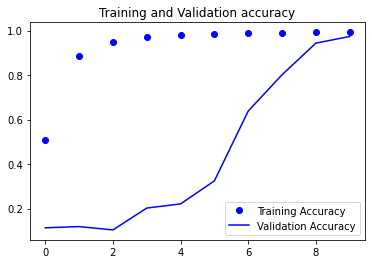

In [22]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


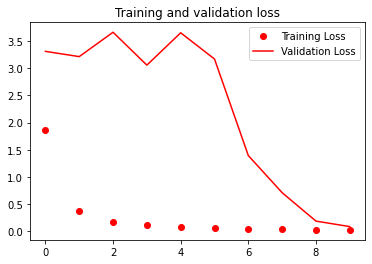

In [23]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [24]:
#get the predictions for the test data
predicted_classes = cnn_model.predict(X_test)
#get the indices to be plotted
y_true = np.argmax(y_test,axis=1)
predicted_classes = np.argmax(predicted_classes,axis=1)

<AxesSubplot:>

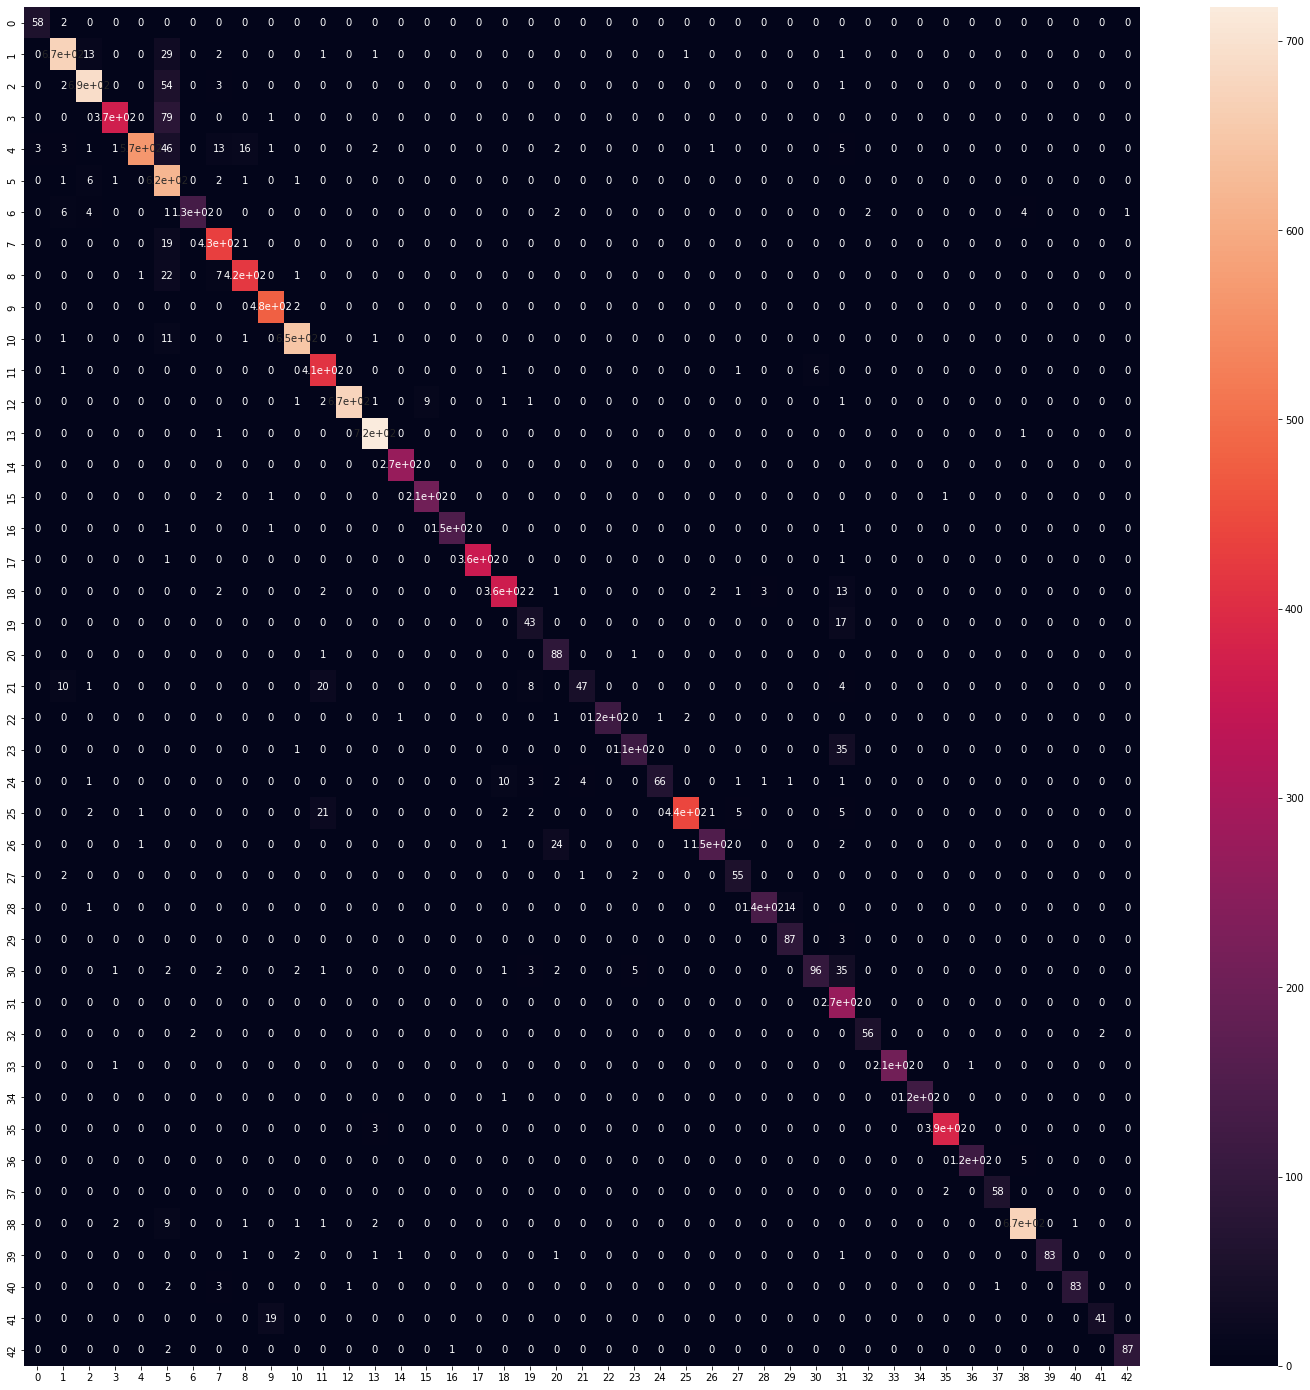

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

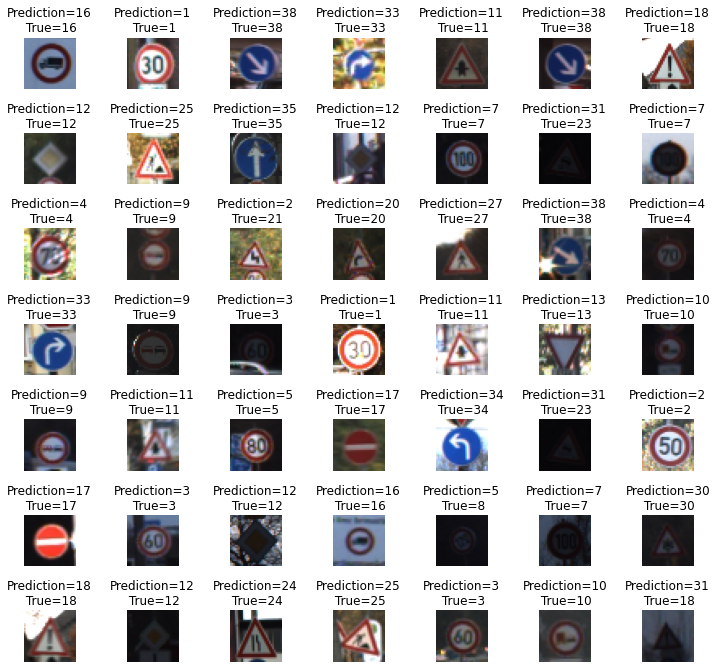

In [26]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)